In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
left = df[df.left==1]
left.shape

(3571, 10)

In [ ]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [ ]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


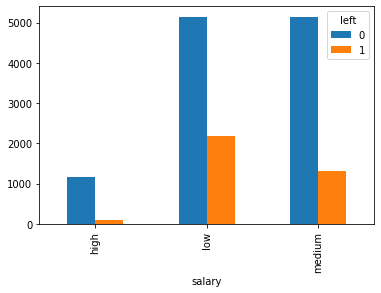

In [ ]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

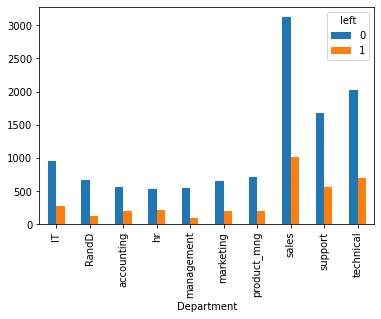

In [ ]:
pd.crosstab(df.Department, df.left).plot(kind='bar')

In [ ]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [ ]:
dum = pd.get_dummies(subdf.salary, prefix="salary")
df_dum = pd.concat([subdf, dum], axis='columns')
df_dum.drop('salary',axis='columns',inplace=True)
x = df_dum
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [ ]:
y = df.left

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(x_test, y_test)

0.7742857142857142

In [ ]:
ndf = pd.concat([x, df.left], axis='columns')
ndf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium,left
0,0.38,157,0,0,1,0,1
1,0.80,262,0,0,0,1,1
2,0.11,272,0,0,0,1,1
3,0.72,223,0,0,1,0,1
4,0.37,159,0,0,1,0,1
...,...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0,1
14995,0.37,160,0,0,1,0,1
14996,0.37,143,0,0,1,0,1
14997,0.11,280,0,0,1,0,1


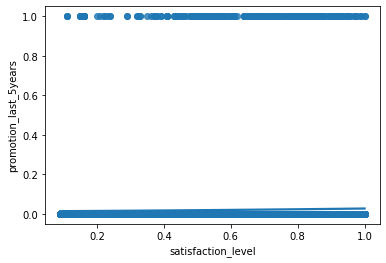

In [ ]:
import seaborn as sns

x = ndf['satisfaction_level']
y = ndf['promotion_last_5years']

sns.regplot(x=x, y=y, data=ndf, logistic=True, ci=None)